# Homework 7, Part One: Lots and lots of questions about beer

### Do your importing and your setup

In [103]:
import pandas as pd
import numpy as np

## Read in the file `craftcans.csv`, and look at the first first rows

In [19]:
df = pd.read_csv('craftcans.csv', na_values=["Does not apply"])
df.head()

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50%,50.0
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.90%,26.0
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.80%,19.0
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.00%,38.0
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.00%,25.0


## How many rows do you have in the data? What are the column types?

In [32]:
df.info()

# noting that everything is a string so will have to convert this somewhere below

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Beer      2416 non-null   object 
 1   Brewery   2410 non-null   object 
 2   Location  2410 non-null   object 
 3   Style     2405 non-null   object 
 4   Size      2410 non-null   object 
 5   ABV       2348 non-null   float64
 6   IBUs      1405 non-null   float64
dtypes: float64(2), object(5)
memory usage: 132.3+ KB


In [21]:
df.shape

(2416, 7)

# Checking out our alcohol

## What are the top 10 producers in terms of different cans of beer?

In [100]:
df.value_counts('Brewery').head(10)


Brewery
Brewery Vivant                62
Oskar Blues Brewery           46
Sun King Brewing Company      38
Cigar City Brewing Company    25
Sixpoint Craft Ales           24
Hopworks Urban Brewery        23
Stevens Point Brewery         22
21st Amendment Brewery        20
Great Crescent Brewery        20
Bonfire Brewing Company       19
Name: count, dtype: int64

## What is the most common ABV? (alcohol by volume)

In [30]:
# cleaning ABVs to cast as percent

df['ABV'] = df.ABV.str.rstrip('%').astype(float)


## Oh, weird, ABV isn't a number. Convert it to a number for me, please.

It's going to take a few steps!

### First, let's just look at the ABV column by itself

In [33]:
# to be honest I was caught up so leaving the next few cells blank


### Hm, `%` isn't part of  a number. Let's remove it.

When you're confident you got it right, save the results back into the `ABV` column.

- *Tip: In programming the easiest way to remove something is to *replacing it with nothing*.*
- *Tip: "nothing" might seem like `NaN` sinc we talked about it a lot in class, but in this case it isn't! It's just an empty string, like ""*
- *Tip: `.replace` is used for replacing ENTIRE cells, while `.str.replace` is useful for replacing PARTS of cells (see my New York example)*

### Now let's turn `ABV` into a numeric data type

Save the results back into the `ABV` column (again), and then check `df.dtypes` to make sure it worked.

- *Tip: We used `.astype(int)` during class, but this has a decimal in it...*

## What's the ABV of the average beer look like?

### Show me in two different ways: one command to show the `median`/`mean`/etc, and secondly show me a chart

In [35]:
df['ABV'].median()

5.6

<Axes: >

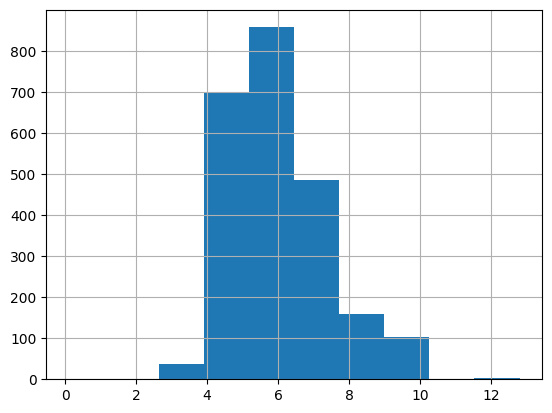

In [37]:
df['ABV'].hist()

### We don't have ABV for all of the beers, how many are we missing them from?

- *Tip: You can use `isnull()` or `notnull()` to see where a column is missing data.*
- *Tip: You just want to count how many `True`s and `False`s there are.*
- *Tip: It's a weird trick involving something we usually use to count things in a column*

In [42]:
df['ABV'].isnull().value_counts()

ABV
False    2348
True       68
Name: count, dtype: int64

# Looking at location

Brooklyn used to produce 80% of the country's beer! Let's see if it's still true.

## What are the top 10 cities in the US for canned craft beer?

In [44]:
df.groupby('Location')['IBUs'].sum().sort_values(ascending = False).head(10)

Location
San Diego, CA        1897.0
Indianapolis, IN     1637.0
Portland, OR         1562.0
Brooklyn, NY         1430.0
Longmont, CO         1328.0
Tampa, FL            1062.0
San Francisco, CA     984.0
Seattle, WA           980.0
Boulder, CO           975.0
Denver, CO            902.0
Name: IBUs, dtype: float64

## List all of the beer from Brooklyn, NY

In [58]:
# creating a Brooklyn dataset with index reset because I got an error below somewhere
df_brooklyn = df[df['Location']== "Brooklyn, NY"].reset_index(drop=True)
df_brooklyn

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52.0
1,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16.0
2,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,NaN
3,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,NaN
4,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7.0
5,Molotov Lite,Evil Twin Brewing,"Brooklyn, NY",American Double / Imperial IPA,16 oz.,8.5,NaN
6,Bengali,Sixpoint Craft Ales,"Brooklyn, NY",American IPA,"24 oz. ""Silo Can""",6.5,62.0
7,Sensi Harvest,Sixpoint Craft Ales,"Brooklyn, NY",American Pale Ale (APA),12 oz.,4.7,50.0
8,Hi-Res,Sixpoint Craft Ales,"Brooklyn, NY",American Double / Imperial IPA,12 oz.,9.9,111.0
9,KelSo Nut Brown Lager,KelSo Beer Company,"Brooklyn, NY",Euro Dark Lager,12 oz.,5.7,19.0


## What brewery in Brooklyn puts out the most different cans of beer?

In [60]:
df_brooklyn.value_counts('Brewery')

Brewery
Sixpoint Craft Ales    24
Brooklyn Brewery        6
Evil Twin Brewing       5
KelSo Beer Company      3
Name: count, dtype: int64

## What are the five most common styles of beer produced by Sixpoint?

In [72]:

# I would like to understand why the below didnt work
# df[df_brooklyn['Brewery'] == "Sixpoint Craft Ales"]

df[(df['Location']== "Brooklyn, NY") & (df['Brewery'] == "Sixpoint Craft Ales")]['Style'].value_counts()

Style
American IPA                      4
Baltic Porter                     2
American Double / Imperial IPA    2
German Pilsener                   2
Cream Ale                         2
Rye Beer                          2
Gose                              1
Belgian Pale Ale                  1
Fruit / Vegetable Beer            1
American Pale Ale (APA)           1
American Strong Ale               1
American Brown Ale                1
American Pale Wheat Ale           1
Saison / Farmhouse Ale            1
American Stout                    1
Pumpkin Ale                       1
Name: count, dtype: int64

## List all of the breweries in New York state.

- *Tip: We want to match *part* of the `Location` column, but not all of it.*
- *Tip: Watch out for `NaN` values! You might be close, but you'll need to pass an extra parameter to make it work without an error.*

In [75]:
df.loc[df.Location.str.contains(", NY", na=False)]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52.0
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16.0
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,NaN
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,NaN
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7.0
...,...,...,...,...,...,...,...
2351,Brooklyn Lager (12 oz.),Brooklyn Brewery,"Brooklyn, NY",American Amber / Red Lager,12 oz.,5.2,NaN
2364,Heinnieweisse Weissebier,Butternuts Beer and Ale,"Garrattsville, NY",Hefeweizen,12 oz.,4.9,NaN
2365,Snapperhead IPA,Butternuts Beer and Ale,"Garrattsville, NY",American IPA,12 oz.,6.8,NaN
2366,Moo Thunder Stout,Butternuts Beer and Ale,"Garrattsville, NY",Milk / Sweet Stout,12 oz.,4.9,NaN


### Now *count* all of the breweries in New York state

In [94]:
df.loc[df.Location.str.contains(", NY", na=False)]['Brewery'].nunique()

16

# Measuring International Bitterness Units

## Display all of the IPAs

Include American IPAs, Imperial IPAs, and anything else with "IPA in it."

IPA stands for [India Pale Ale](https://www.bonappetit.com/story/ipa-beer-styles), and is probably the most popular kind of beer in the US for people who are drinking [craft beer](https://www.craftbeer.com/beer/what-is-craft-beer).

In [141]:
df_ipa = df.loc[df.Style.str.contains("IPA", na=False)]
df_ipa

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.5,50.0
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.0,68.0
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.6,68.0
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.0,65.0
24,Habitus (2014),Mike Hess Brewing Company,"San Diego, CA",American Double / Imperial IPA,16 oz.,8.0,100.0
...,...,...,...,...,...,...,...
2403,Abrasive Ale,Surly Brewing Company,"Brooklyn Center, MN",American Double / Imperial IPA,16 oz.,9.7,120.0
2406,Furious,Surly Brewing Company,"Brooklyn Center, MN",American IPA,16 oz.,6.2,99.0
2408,Brew Free! or Die IPA,21st Amendment Brewery,"San Francisco, CA",American IPA,12 oz.,7.0,65.0
2412,GUBNA Imperial IPA,Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,9.9,100.0


IPAs are usually pretty hoppy and bitter. IBU stands for [International Bitterness Unit](http://www.thebrewenthusiast.com/ibus/), and while a lot of places like to brag about having the most bitter beer (it's an American thing!), IBUs don't necessary *mean anything*.

Let's look at how different beers have different IBU measurements.

## Try to get the average IBU measurement across all beers

In [97]:
# cleaning IBUs to cast as integers

df['IBUs'] = df.IBUs.astype(float)


df['IBUs'].median()

35.0

### Oh no, it doesn't work!

It looks like some of those values *aren't numbers*. There are two ways to fix this:

- *Tip: If you use [`na_values`](http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.read_csv.html). be sure to go add it up top and run all of your cells again. You can also use `.replace` but I don't think that's as good of an idea.*
- *Tip: Make sure you're giving `na_values` a LIST, not just a string*

### Now try to get the average IBUs again

In [ ]:
# I already did this 

## Draw the distribution of IBU measurements, but with *twenty* bins instead of the default of 10

- *Tip: Every time I ask for a distribution, I'm looking for a histogram*
- *Tip: Use the `?` to get all of the options for building a histogram*
- *Tip: Make sure your `matplotlib` thing is set up right!*

array([[<Axes: title={'center': 'IBUs'}>]], dtype=object)

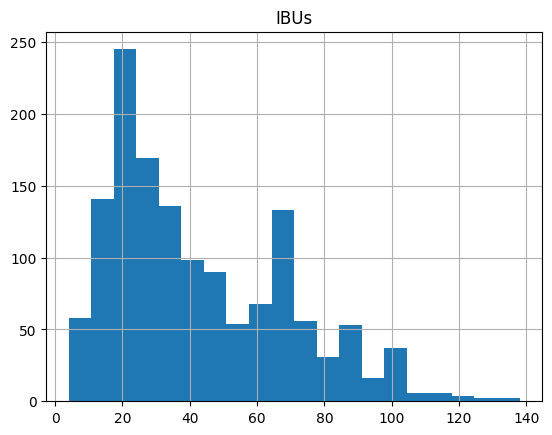

In [102]:
df.hist('IBUs', bins = 20)

## Hm, Interesting distribution. List all of the beers with IBUs above the 75th percentile

- *Tip: There's a single that gives you the 25/50/75th percentile*
- *Tip: You can just manually type the number when you list those beers*

In [107]:
IBU_75 = df['IBUs'].quantile(q=0.75)
IBU_75

64.0

In [109]:
df[df['IBUs'] > IBU_75]['Beer']

6                Citra Ass Down
7                London Balling
14                  Rico Sauvin
17                 Pile of Face
21                   Excess IPL
                 ...           
2408      Brew Free! or Die IPA
2410    Ten Fidy Imperial Stout
2412         GUBNA Imperial IPA
2414          Gordon Ale (2009)
2415            Dale's Pale Ale
Name: Beer, Length: 346, dtype: object

## List all of the beers with IBUs below the 25th percentile

In [111]:
IBU_25 = df['IBUs'].quantile(q=0.25)
df[df['IBUs'] < IBU_25]['Beer']

2                          Wall's End
12                           Sho'nuff
13                        Bloody Show
18                     The Brown Note
19                        House Lager
                    ...              
2372                 Bombshell Blonde
2385              Bikini Blonde Lager
2396                 Royal Weisse Ale
2404                             Hell
2409    Hell or High Watermelon Wheat
Name: Beer, Length: 338, dtype: object

## List the median IBUs of each type of beer. Graph it.

Put the highest at the top, and the missing ones at the bottom.

- Tip: Look at the options for `sort_values` to figure out the `NaN` thing. The `?` probably won't help you here.

In [113]:
df.groupby('Style')['IBUs'].median().sort_values(ascending = False)

Style
American Barleywine                   96.0
Russian Imperial Stout                94.0
American Double / Imperial IPA        91.0
American Double / Imperial Pilsner    85.0
American Black Ale                    73.0
                                      ... 
Kristalweizen                          NaN
Low Alcohol Beer                       NaN
Mead                                   NaN
Rauchbier                              NaN
Shandy                                 NaN
Name: IBUs, Length: 99, dtype: float64

<Axes: ylabel='Style'>

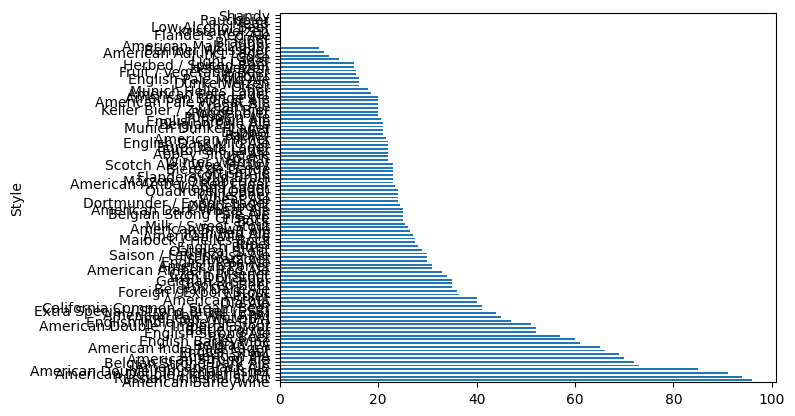

In [117]:
df.groupby('Style')['IBUs'].median().sort_values(ascending = False).plot(kind = 'barh')

## Hmmmm, it looks like they are generally different styles. What are the most common 5 styles of high-IBU beer vs. low-IBU beer?

- *Tip: You'll want to think about it in three pieces - filtering to only find the specific beers beers, then finding out what the most common styles are, then getting the top 5.*
- *Tip: You CANNOT do this in one command. It's going to be one command for the high and one for the low.*
- *Tip: "High IBU" means higher than 75th percentile, "Low IBU" is under 25th percentile*

In [133]:
df[df['IBUs'] > IBU_75].value_counts('Style').head()

Style
American IPA                      195
American Double / Imperial IPA     72
American Pale Ale (APA)            18
American Black Ale                 15
American Strong Ale                 9
Name: count, dtype: int64

In [134]:
df[df['IBUs'] < IBU_25].value_counts('Style').head()

Style
American Pale Wheat Ale    43
American Blonde Ale        36
Fruit / Vegetable Beer     28
Hefeweizen                 21
Witbier                    20
Name: count, dtype: int64

## Get the average IBU of "Witbier", "Hefeweizen" and "American Pale Wheat Ale" styles

I'm counting these as wheat beers. If you see any other wheat beer categories, feel free to include them. I want ONE measurement and ONE graph, not three separate ones. And 20 to 30 bins in the histogram, please.

- *Tip: I hope that `isin` is in your toolbox*

In [138]:
styles = ["Witbier", "Hefeweizen", "American Pale Wheat Ale"]
df[df['Style'].isin(styles)].groupby('Style')['IBUs'].median()

Style
American Pale Wheat Ale    20.0
Hefeweizen                 15.0
Witbier                    15.5
Name: IBUs, dtype: float64

## Draw a histogram of the IBUs of those beers

Style
American Pale Wheat Ale    Axes(0.125,0.11;0.775x0.77)
Hefeweizen                 Axes(0.125,0.11;0.775x0.77)
Witbier                    Axes(0.125,0.11;0.775x0.77)
Name: IBUs, dtype: object

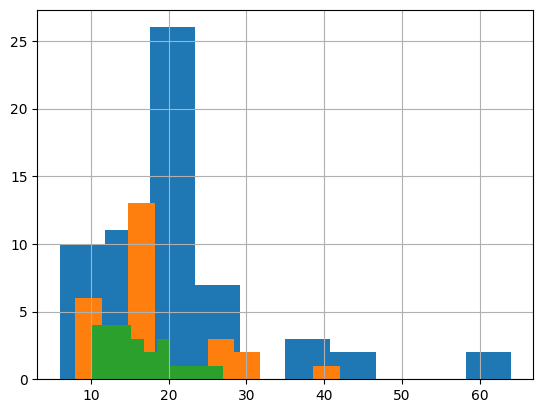

In [139]:
df[df['Style'].isin(styles)].groupby('Style')['IBUs'].hist()

## Get the average IBU of any style with "IPA" in it (also draw a histogram)

In [143]:
df_ipa.groupby('Style')['IBUs'].median()

Style
American Double / Imperial IPA    91.0
American IPA                      69.0
American White IPA                45.0
Belgian IPA                       61.0
English India Pale Ale (IPA)      47.0
Name: IBUs, dtype: float64

Style
American Double / Imperial IPA    Axes(0.125,0.11;0.775x0.77)
American IPA                      Axes(0.125,0.11;0.775x0.77)
American White IPA                Axes(0.125,0.11;0.775x0.77)
Belgian IPA                       Axes(0.125,0.11;0.775x0.77)
English India Pale Ale (IPA)      Axes(0.125,0.11;0.775x0.77)
Name: IBUs, dtype: object

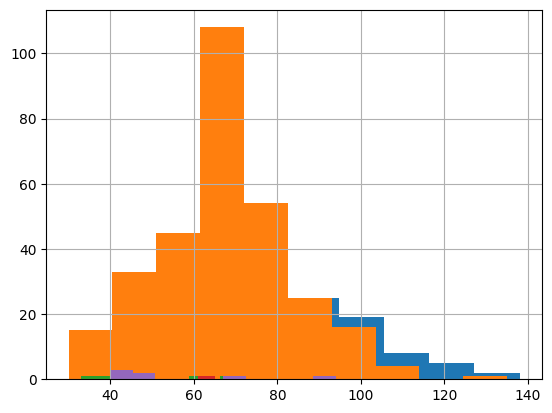

In [144]:
df_ipa.groupby('Style')['IBUs'].hist()

## Plot those two histograms in the same cell!

I swear the behavior of this changes every year. Does it make two charts? Does it overlap them in one?

Style
American Pale Wheat Ale    Axes(0.125,0.11;0.775x0.77)
Hefeweizen                 Axes(0.125,0.11;0.775x0.77)
Witbier                    Axes(0.125,0.11;0.775x0.77)
Name: IBUs, dtype: object

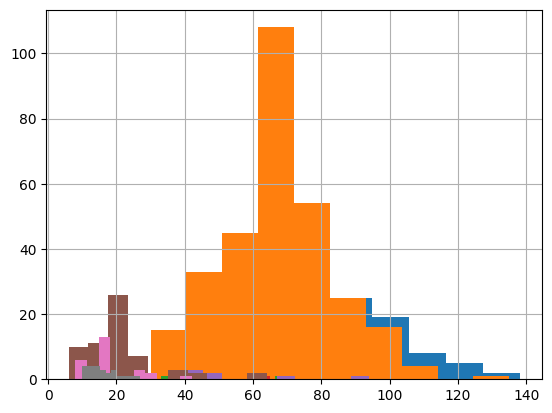

In [147]:
df_ipa.groupby('Style')['IBUs'].hist()
df[df['Style'].isin(styles)].groupby('Style')['IBUs'].hist()

## Compare the ABV of wheat beers vs. IPAs : their IBUs were really different, but how about their alcohol percentage?

Wheat beers might include witbier, hefeweizen, American Pale Wheat Ale, and anything else you think is wheaty. IPAs probably have "IPA" in their name.

In [151]:
df[df['Style'].isin(styles)].groupby('Style')['ABV'].median()

Style
American Pale Wheat Ale    4.8
Hefeweizen                 5.0
Witbier                    5.0
Name: ABV, dtype: float64

In [148]:
df_ipa.groupby('Style')['ABV'].median()

Style
American Double / Imperial IPA    8.7
American IPA                      6.5
American White IPA                6.0
Belgian IPA                       7.0
English India Pale Ale (IPA)      6.3
Name: ABV, dtype: float64

## Good work!